# **Background**


The dataset contains information about different houses in Boston bases on features such as crime rate, average number of rooms per dwelling, age and median value of owner-occupied homes etc. The data is to be used to predict the housing prices of a new house using linear regression.

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

# **1. Import Libraries**

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# **2. Load Data**

In [114]:
from sklearn.datasets import load_boston
df = load_boston()

In [115]:
print(df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [116]:
df.data.shape

(506, 13)

In [117]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [118]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Pandas Dataframe Conversion**

In [119]:
boston = pd.DataFrame(df.data)

In [120]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [121]:
boston.columns = df.feature_names

In [122]:
boston['PRICE'] = df.target

Check the head, info() and shape of the data set.

In [123]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [124]:
boston.shape

(506, 14)

In [125]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Summary Statistics**

Generative descriptive statistics which include those  that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [126]:
boston.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# **3. Exploratory Data Analysis**

Check the number of null values in each column.

In [127]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There appears to be no null, we can then proceed exploring the data.

Check the correlations existing in the data to ascertain which which features affect the target variable the most.

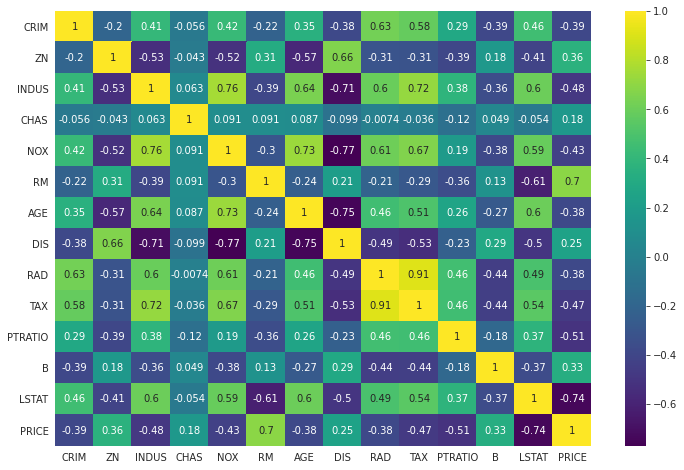

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(boston.corr(),cmap='viridis',annot=True,fmt='.2g')

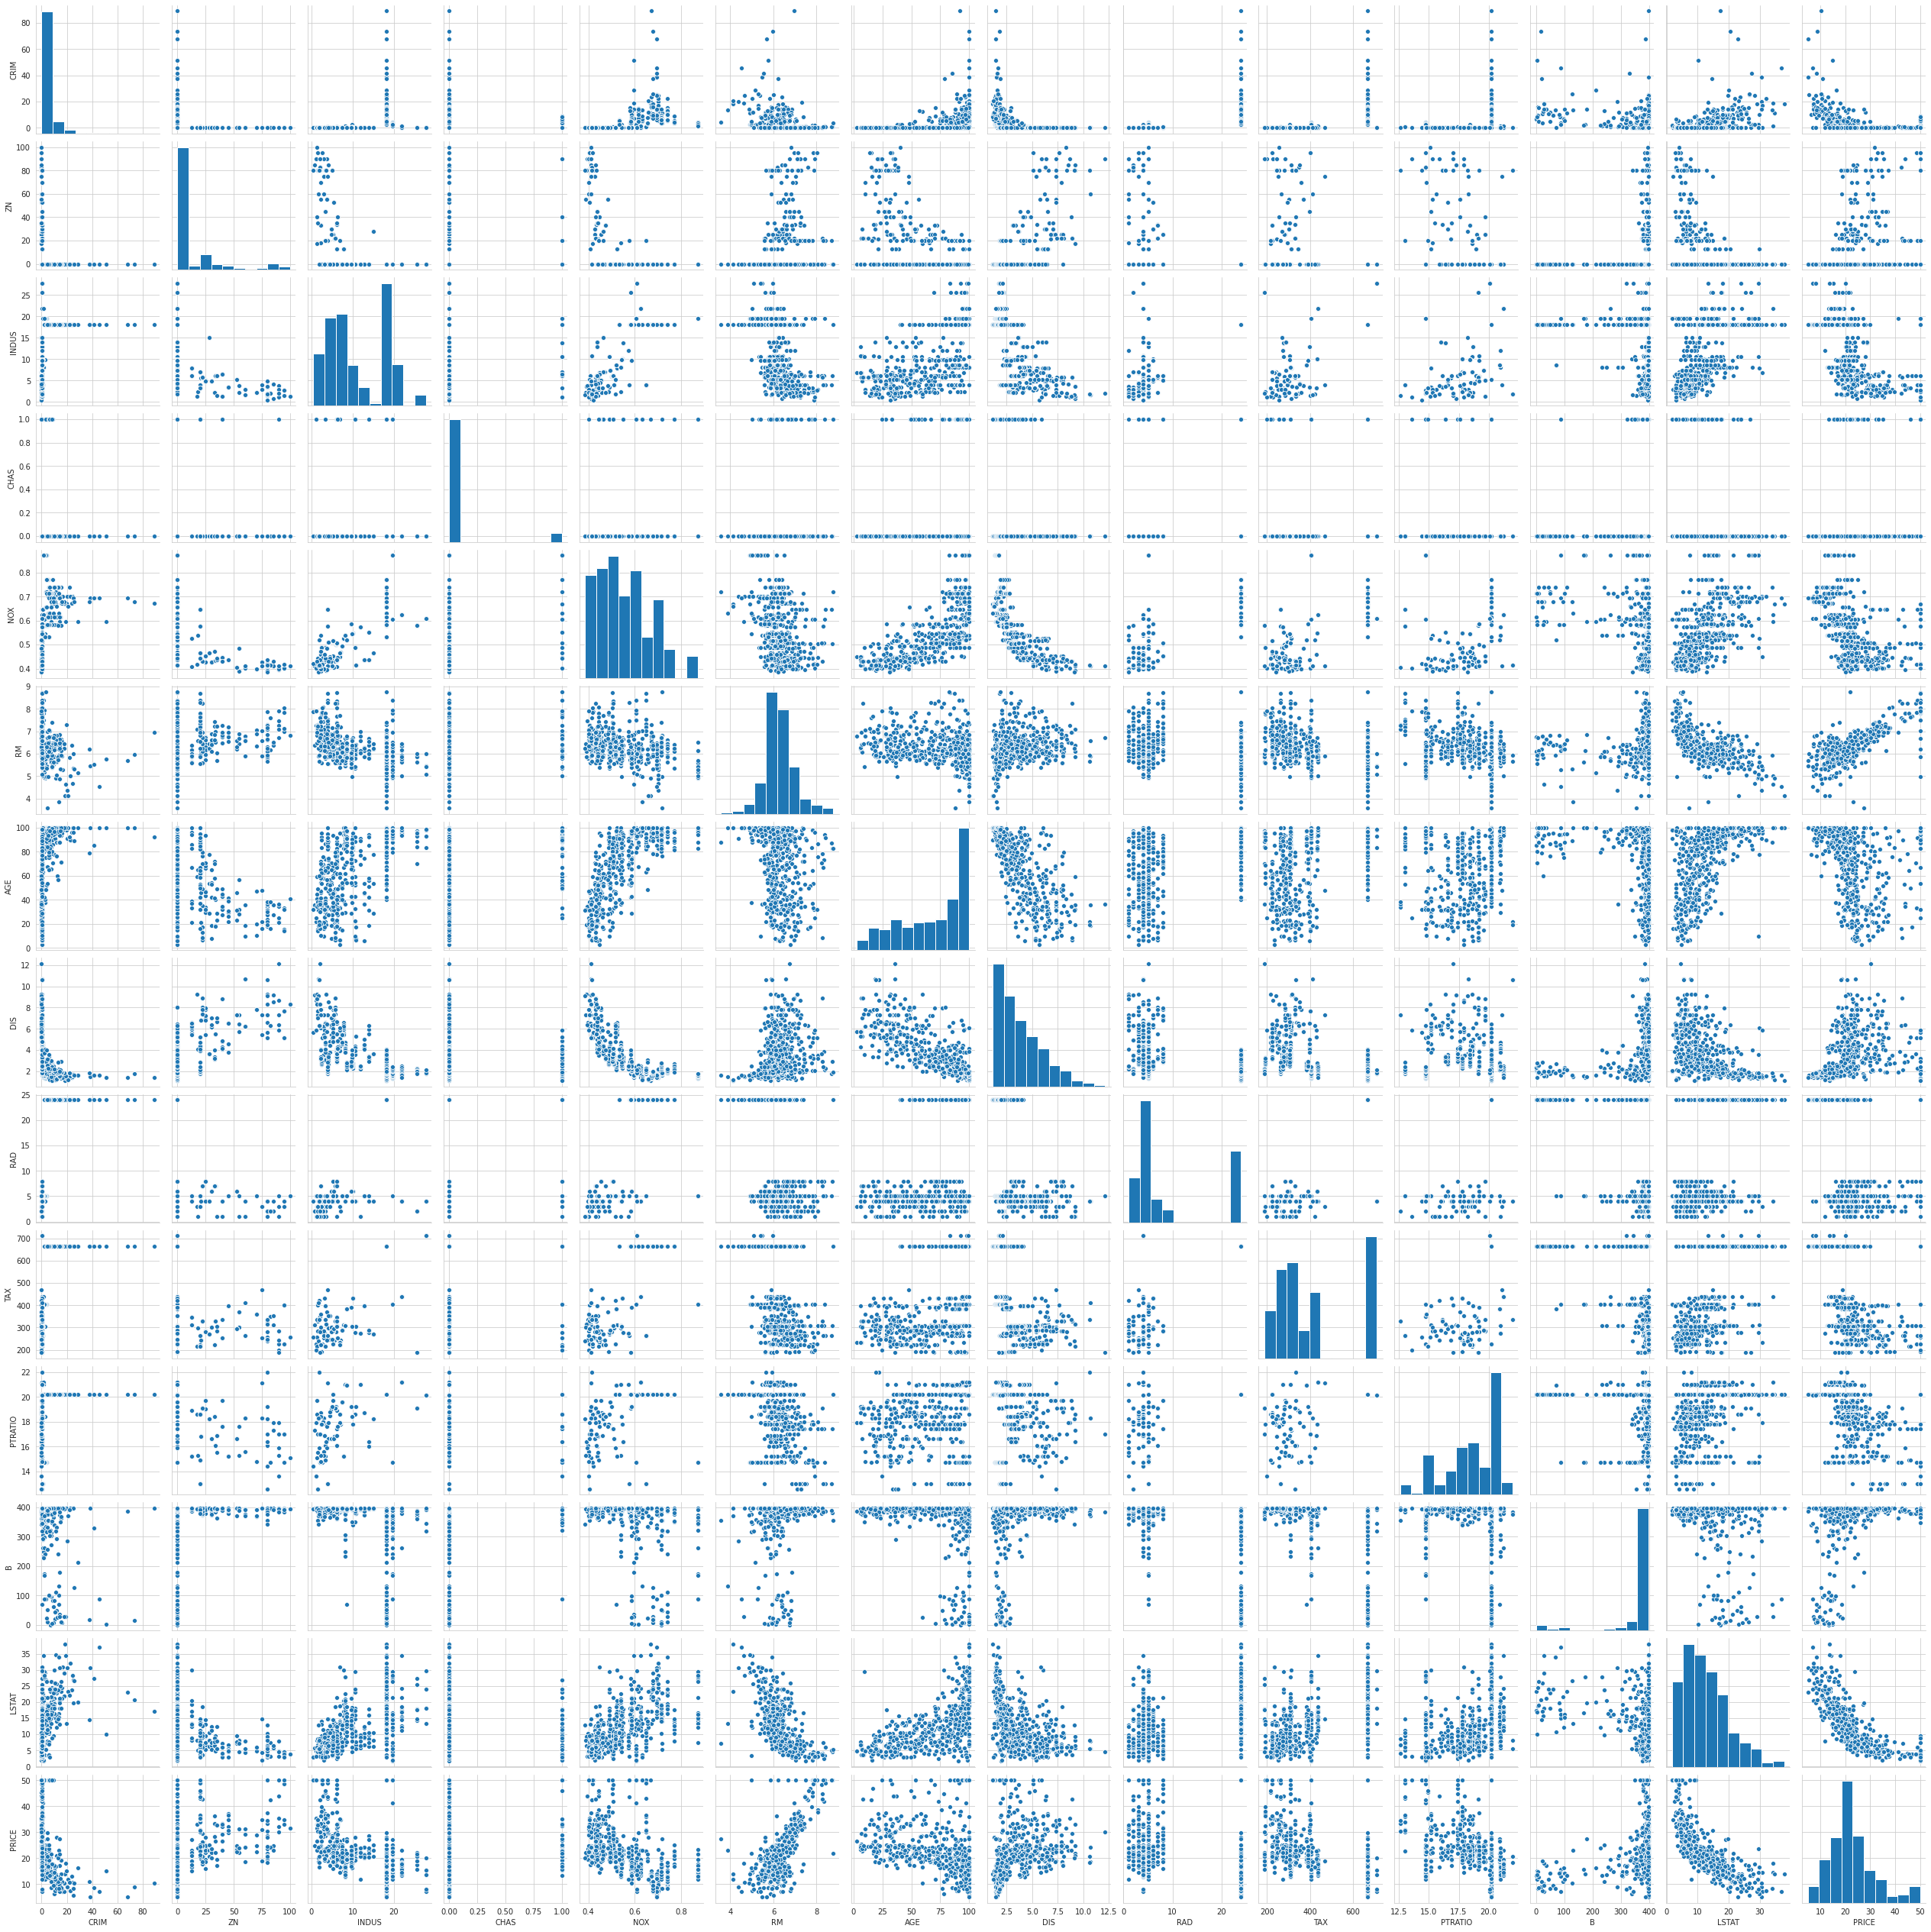

In [94]:
sns.pairplot(data=boston)

**Use seaborn to create a distplot of the target feature.**

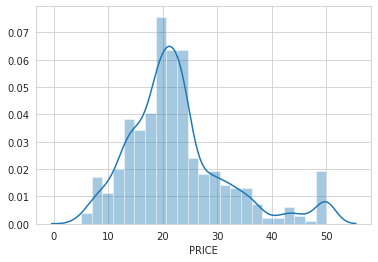

In [95]:
sns.distplot(boston['PRICE'],kde=True)

There seems to be some outlier in the PRICE column. Investigate this further by creating a boxplot. In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

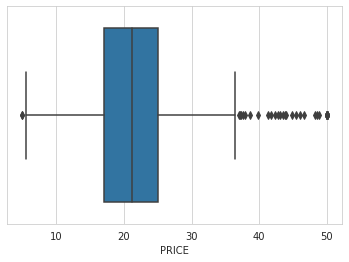

In [96]:
sns.boxplot(boston['PRICE'])

**Detecting and Filtering Outliers**

Z-Score

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.


In [97]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [98]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [99]:
boston_df = boston[(z < 3).all(axis=1)]

In [100]:
boston_df.shape

(415, 14)

# **4. Training and Testing Data**

Now that we have explored the data, we can go on and split the data into training and testing sets.

In [101]:
X = boston_df.drop('PRICE',axis=1)
y = boston_df['PRICE']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **5. Training the Model**

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lm = LinearRegression()

In [105]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients and intercept of the model**

In [106]:
print('Coefficients:',lm.coef_)
print('\n')
print('Intercept:',lm.intercept_)

Coefficients: [-1.60776956e-01  4.89661373e-03  5.38539602e-02 -1.55583879e-13
 -9.19737691e+00  5.50573499e+00 -3.58125984e-02 -1.11873029e+00
  2.47071037e-01 -1.29485109e-02 -8.63775135e-01  7.40016222e-03
 -3.45858057e-01]


Intercept: 19.43619619444854


# **6. Predicting Test Data**

Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [107]:
predictions = lm.predict(X_test)

 Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

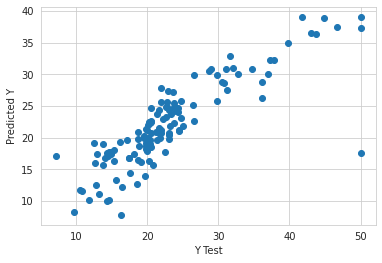

In [108]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **7. Evaluating the Model**

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared

In [109]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.0827765126739965
MSE: 22.16106300161814
RMSE: 4.7075538235497785


# **8. Residuals**

Plot a histogram of the residuals and make sure it looks normally distributed

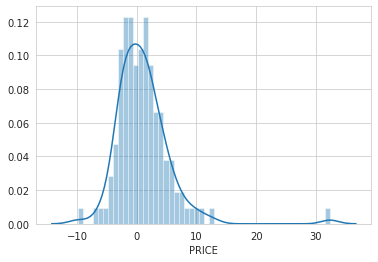

In [110]:
sns.distplot((y_test-predictions),bins=50)

# **9. Conclusion**

We still want to intepret the highest predictors or influencers on the price of the house, that is, to ascertain what impact a single unit change in a feature has on the price. Let's see if we can interpret the coefficients at all to get an idea.

In [111]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CRIM,-1.607770e-01
ZN,4.896614e-03
INDUS,5.385396e-02
CHAS,-1.555839e-13
NOX,-9.197377e+00
RM,5.505735e+00
AGE,-3.581260e-02
DIS,-1.118730e+00
RAD,2.470710e-01
TAX,-1.294851e-02


In [112]:
coeffecients.apply(lambda x: '%.5f' % x, axis=1)

CRIM       -0.16078
ZN          0.00490
INDUS       0.05385
CHAS       -0.00000
NOX        -9.19738
RM          5.50573
AGE        -0.03581
DIS        -1.11873
RAD         0.24707
TAX        -0.01295
PTRATIO    -0.86378
B           0.00740
LSTAT      -0.34586
dtype: object

Intepreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **per capita crime rate by town** is associated with an **increase of -0.16078 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **proportion of residential land zoned for lots over 25,000 sq.ft.** is associated with an **increase of 0.00490 total dollars in house price.**


- Holding all other features fixed, a 1 unit increase in **proportion of non-retail business acres per town** is associated with **an increase of 0.05385 total dollars in house price.**


- Holding all other features fixed, a 1 unit increase in **Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)** is associated with an **increase of -0.00000 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **nitric oxides concentration (parts per 10 million)** is associated with an **increase of -9.19738 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **average number of rooms per dwelling** is associated with an **increase of  5.50573 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **proportion of owner-occupied units built prior to 1940** is associated with **an increase of -0.03581 total dollars in house price.** 

- Holding all other features fixed, a 1 unit increase in **weighted distances to five Boston employment centres** is associated with** an increase of -1.11873 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **index of accessibility to radial highways** is associated with an **increase of 0.24707 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **full-value property-tax rate per $10,000** is associated with **an increase of  -0.01295 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **pupil-teacher ratio by town** is associated with an **increase of -0.86378 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in **1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town** is associated with an **increase of 0.00740 total dollars in house price.**

- Holding all other features fixed, a 1 unit increase in** % lower status of the populatio** is associated with an **increase of -0.34586 total dollars in house price.**